# Data Wrangling

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msn

# Set default Plotting theme
def set_style():
    plt.style.use(['seaborn-whitegrid', 'seaborn-paper'])
    plt.rc('font', family='serif')
    plt.rc('axes', titlesize=18)
    plt.rc('axes', labelsize=16)
    plt.rc('xtick', labelsize=14)
    plt.rc('ytick', labelsize=14)
    plt.rc('legend', fontsize=14)
    plt.rc('figure', titlesize=18)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


## Gather

In [2]:
# Load the data set
medcost_df = pd.read_csv(r"C:\Users\HP\Desktop\Med_Cost_Prediction\Data\Raw\insurance.csv")

# Print a subset of the data set
print(medcost_df.head())

   age   sex      bmi      children   smoker   region          charges
0    19  female    27.900          0  yes      southwest   16884.92400
1    18  male      33.770          1  no       southeast    1725.55230
2    28  male      33.000          3  no       southeast    4449.46200
3    33  male      22.705          0  no       northwest   21984.47061
4    32  male      28.880          0  no       northwest    3866.85520


## Assess

1. Statistical Summary of the dataset

In [3]:
# Get a statistical summary of our dataset
print(medcost_df.describe())

              age       bmi        children        charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [4]:
print(medcost_df.describe(include='all'))

               age   sex          bmi        children   smoker   region      \
count   1338.000000     1338  1338.000000  1338.000000     1338        1338   
unique          NaN        2          NaN          NaN        2           4   
top             NaN  male             NaN          NaN  no       southeast    
freq            NaN      676          NaN          NaN     1064         364   
mean      39.207025      NaN    30.663397     1.094918      NaN         NaN   
std       14.049960      NaN     6.098187     1.205493      NaN         NaN   
min       18.000000      NaN    15.960000     0.000000      NaN         NaN   
25%       27.000000      NaN    26.296250     0.000000      NaN         NaN   
50%       39.000000      NaN    30.400000     1.000000      NaN         NaN   
75%       51.000000      NaN    34.693750     2.000000      NaN         NaN   
max       64.000000      NaN    53.130000     5.000000      NaN         NaN   

             charges  
count    1338.000000  
uniqu

2. Check for Duplicates

In [5]:
# Check for duplicates in our data set
sum(medcost_df.duplicated())

1

3. Check for missing values

<Axes: >

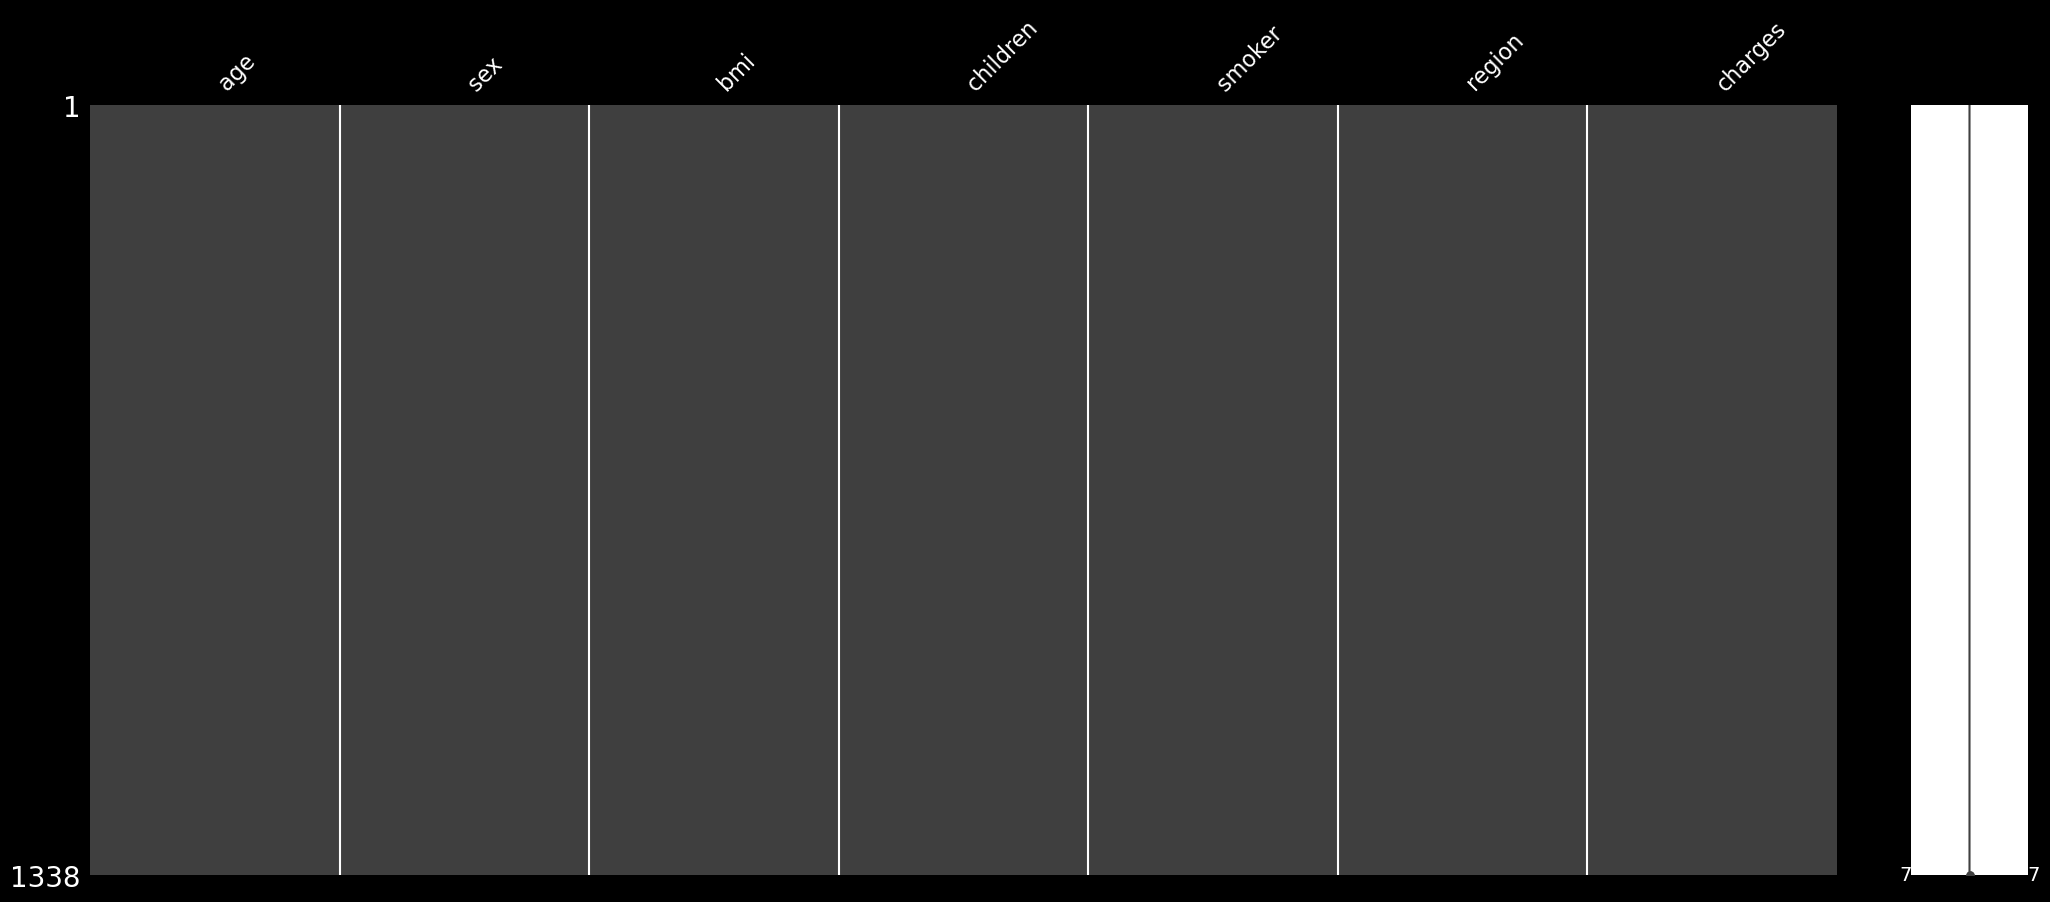

In [6]:
# Check for missing values
msn.matrix(medcost_df)

In [7]:
# Check for missing values in our dataset
medcost_df.isnull().sum()

age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64

4. Check for Data types


In [8]:
# Check for data types
medcost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

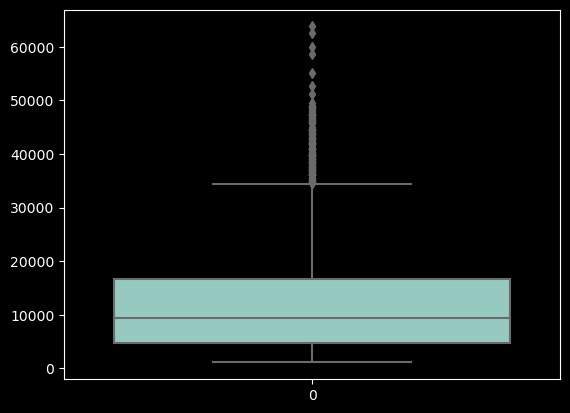

In [9]:
# Check for outliers in the target variable
sns.boxplot(medcost_df['charges'])


**Findings of the assessment.**

1. There is a duplicate example in the dataset.
2. All the columns are in their desired format.
3. There are no missing values in the dataset.
4. There are outliers in the target variable
5. Each observation is a row.
6. Each variable is a column.

## Clean

**The Cleaning Procedure to be followed**

1. Remove the duplicate example.


In [10]:
# Remove duplicates
medcost_df.drop_duplicates(inplace=True)

In [11]:
# Recheck for presence of duplicates
sum(medcost_df.duplicated())

0

## Test

In [12]:
# Check the info of our dataset
medcost_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   sex         1337 non-null   object 
 2   bmi         1337 non-null   float64
 3   children    1337 non-null   int64  
 4   smoker      1337 non-null   object 
 5   region      1337 non-null   object 
 6   charges     1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


All duplicates have been removed from the dataset

In [13]:
# Save the clean dataset
medcost_df.to_csv(r"C:\Users\HP\Desktop\Med_Cost_Prediction\Data\Processed\cleaned_data.csv", index=False)